<a href="https://colab.research.google.com/github/Amey-Thakur/TSF-UNSUPERVISED-MACHINE-LEARNING/blob/main/TSF_INTERNSHIP_TASK_2_UNSUPERVISED_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation - Supervised Learning ML
- Created By Amey Mahendra Thakur

## Task: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Step 1 - Importing Libraries and Loading Dataset

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/content/Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2 - Exploratory Data Analysis

In [4]:
data.shape

(150, 6)

In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Step 3 - Find The Number of Clusters

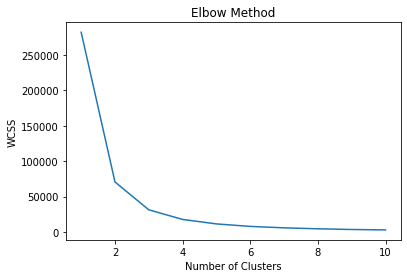

In [9]:
x = data.iloc[:, [0,1,2,3]].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot, A clear elbow is seen to be formed at 3.
Thus, the optimum number of clusters is 3. 

## Step 4 - Train The Model

In [10]:
#Assigning the 'kmeans' classifier
kmeans = KMeans(n_clusters= 3,init = 'k-means++',max_iter = 300,n_init = 10,random_state= 10)
y_kmeans = kmeans.fit_predict(x)

## Step 5 - Cluster Visualization

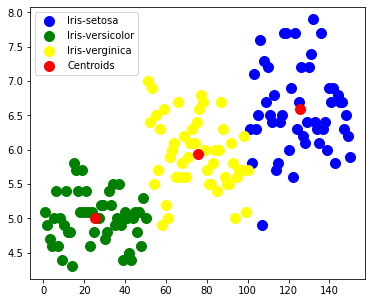

In [11]:
plt.figure(figsize = (6,5))


plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1] , s = 100,c = 'blue',label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1] , s = 100,c = 'green',label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1] , s = 100,c = 'yellow',label = 'Iris-verginica')

#Centroid Plotting of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c = 'red',label = 'Centroids')
plt.legend()
plt.show()